<a href="https://colab.research.google.com/github/juancolson/Manga-Bounding-Boxes/blob/master/here_there.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib pillow scipy

(728, 1048)


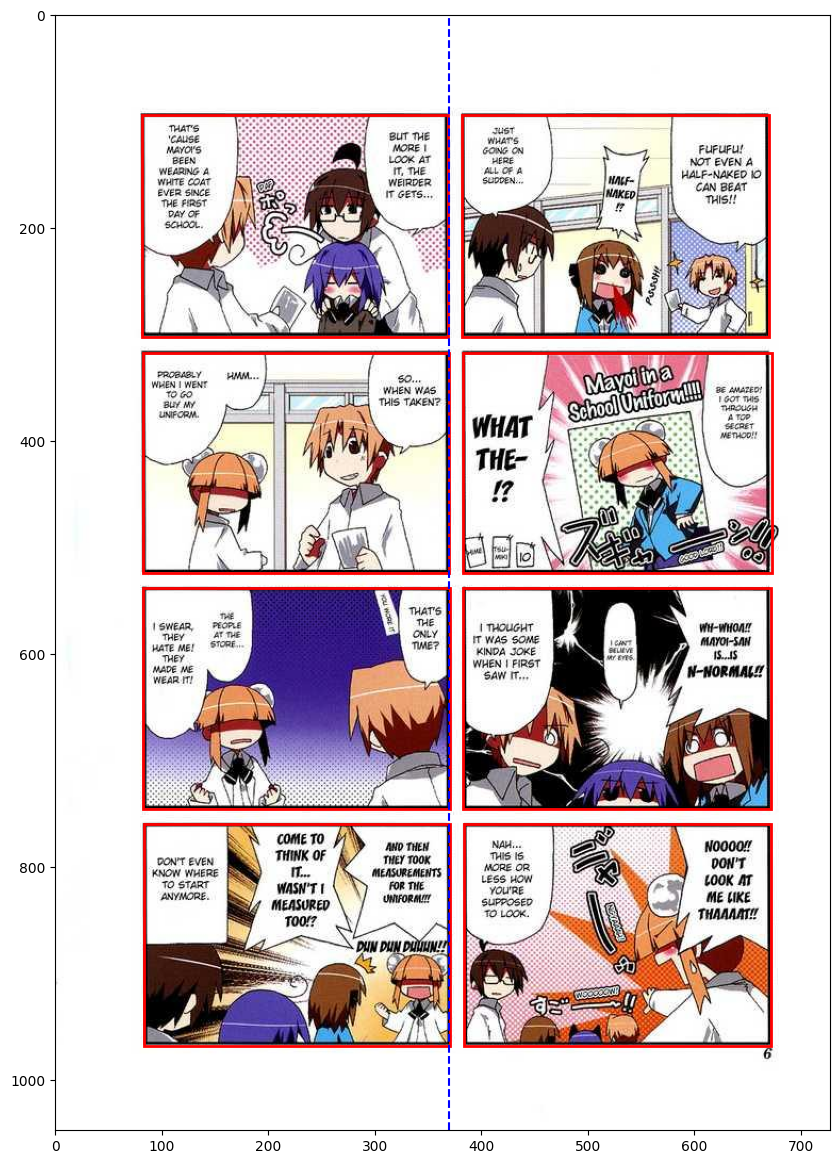

Resulting Array:
{'height': 1048,
 'pos': [[382, 94, 288, 208],
         [383, 317, 290, 207],
         [383, 538, 289, 208],
         [384, 760, 288, 208],
         [81, 94, 288, 208],
         [82, 317, 288, 207],
         [82, 538, 289, 208],
         [83, 760, 288, 208]],
 'source': '0001-012.png',
 'width': 728}


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import label, find_objects
from pprint import pprint

# Load the image
image_path = "/content/0001-012.png"  # Update this with the path to your image
image = Image.open(image_path)

print(image.size)

# Convert the image to grayscale
gray_image = image.convert("L")
gray_array = np.array(gray_image)

# Apply a binary threshold to get a binary image (black and white)
threshold = 50
binary_image = gray_array < threshold

# Function to find bounding boxes of connected components
def find_bounding_boxes(binary_image):
    # Label connected components
    labeled_array, num_features = label(binary_image)

    # Find bounding boxes of each connected component
    slices = find_objects(labeled_array)

    # Extract bounding box coordinates
    boxes = []
    for sl in slices:
        y1, x1 = sl[0].start, sl[1].start
        y2, x2 = sl[0].stop, sl[1].stop
        width = x2 - x1
        height = y2 - y1
        # Ignore boxes with height or width less than 100 px
        if width >= 100 and height >= 100:
            boxes.append((x1, y1, width, height))

    return boxes

# Find bounding boxes of black regions
black_boxes = find_bounding_boxes(binary_image)

# Visualize the bounding boxes on the original image
plt.figure(figsize=(10, 15))
divider = 370
plt.axvline(x=divider, color='b', linestyle='--')
plt.imshow(image)
for (x, y, w, h) in black_boxes:
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2))
plt.show()

sorted_box_ = []
# Print the coordinates and sizes of the detected boxes
for box in black_boxes:
    # print(f"Position: (x: {box[0]}, y: {box[1]}), Size: Width {box[2]} px, Height {box[3]} px")
    sorted_box_.append([box[0], box[1], box[2], box[3]])

left_side = [item for item in sorted_box_ if item[0] < divider]
right_side = [item for item in sorted_box_ if item[0] >= divider]

# Sort by y-coordinate (top to bottom) within each side
left_side_sorted = sorted(left_side, key=lambda x: x[1])
right_side_sorted = sorted(right_side, key=lambda x: x[1])

# Combine the sorted arrays
result = right_side_sorted + left_side_sorted

# Print the resulting array
print("Resulting Array:")

obje = {
    "source": image_path.replace("/content/", ""),
    "pos": result,
    "height": image.size[1],
    "width": image.size[0],
}


pprint( obje)

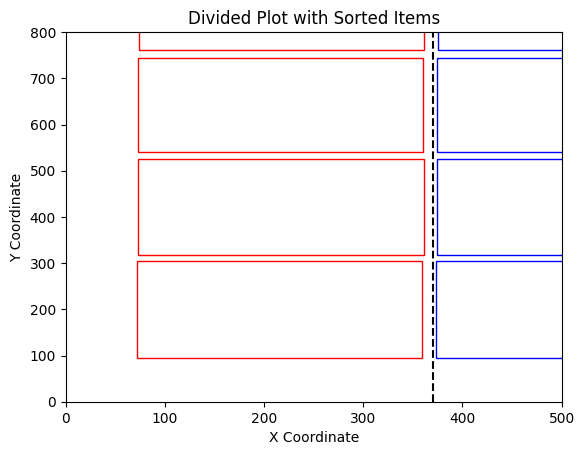

In [19]:
import matplotlib.pyplot as plt

# Data
data = [
    [72, 94, 287, 210],
    [373, 94, 288, 210],
    [73, 318, 288, 207],
    [374, 318, 288, 207],
    [73, 540, 287, 205],
    [374, 540, 288, 205],
    [74, 761, 287, 207],
    [375, 761, 288, 208]
]

# Divide data into left and right based on x-coordinate
left_side = [item for item in data if item[0] < 370]  # Assuming 200 is the middle x-coordinate
right_side = [item for item in data if item[0] >= 370]

# Sort each side by y-coordinate
left_side_sorted = sorted(left_side, key=lambda x: x[1])
right_side_sorted = sorted(right_side, key=lambda x: x[1])

# Plotting
fig, ax = plt.subplots()

# Plot right side
for item in right_side_sorted:
    ax.add_patch(plt.Rectangle((item[0], item[1]), item[2], item[3], edgecolor='blue', facecolor='none'))

# Plot left side
for item in left_side_sorted:
    ax.add_patch(plt.Rectangle((item[0], item[1]), item[2], item[3], edgecolor='red', facecolor='none'))

# Draw vertical axis dividing line
ax.axvline(x=370, color='black', linestyle='--')

# Set plot limits
ax.set_xlim(0, 500)  # Adjust limits as needed
ax.set_ylim(0, 800)  # Adjust limits as needed

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Divided Plot with Sorted Items')
plt.show()
